# BEM114 Homework 2 - Statistical Arbitrage
**Names:** Andrew Zabelo, Daniel Wen, Kyle McCandless  
**UIDs:** , , 2157818

## Setup

In [101]:
# Imports
import pandas as pd
import numpy as np
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm

import matplotlib.pyplot as plt

## Problem 1
### Part A

In [116]:
# Read data
df = pd.read_csv('crsp_1926_2020.zip')

# Convert returns to numeric and drop NaNs
df['RET'] = pd.to_numeric(df['RET'], errors='coerce')
df = df.dropna()

# Set types for relevant columns
df = df.astype({'date': 'string', 'SHRCD': 'int', 'EXCHCD': 'int'})

# Drop day information in the dates
df['date'] = df['date'].str[:-3]

# Follow part A instructions
df = df[df['SHRCD'].isin([10, 11])]
df = df[df['EXCHCD'].isin([1, 2, 3])]
df.loc[df['PRC'] < 0, 'PRC'] = 'NA'
df

,PERMNO,date,SHRCD,EXCHCD,PRC,RET,SHROUT
2,10000,1986-02,10,3,NA,-0.257143,3680.0
3,10000,1986-03,10,3,NA,0.365385,3680.0
4,10000,1986-04,10,3,NA,-0.098592,3793.0
5,10000,1986-05,10,3,NA,-0.222656,3793.0
6,10000,1986-06,10,3,NA,-0.005025,3793.0
...,...,...,...,...,...,...,...
4705164,93436,2020-08,11,3,498.32001,0.741452,931809.0
4705165,93436,2020-09,11,3,429.01001,-0.139087,948000.0
4705166,93436,2020-10,11,3,388.04001,-0.095499,947901.0
4705167,93436,2020-11,11,3,567.59998,0.462736,947901.0


### Part B

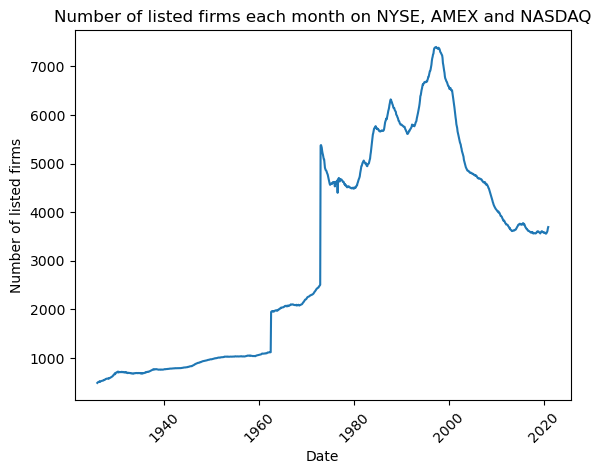

In [115]:
# Group by year and month
by_month = df.groupby(df['date'])['PERMNO'].nunique().reset_index()
by_month['date'] = pd.to_datetime(by_month['date'])

# Create plot of number of firms listed each month
plt.plot(by_month['date'], by_month['PERMNO'])
plt.title('Number of listed firms each month on NYSE, AMEX and NASDAQ')
plt.xlabel('Date')
plt.ylabel('Number of listed firms')
plt.xticks(rotation=45)
plt.show()

## Problem 2

## Problem 3

## Problem 4
### Part A
Note: losing ~3000 (<0.1% of) rows since FF website starts July 1926, Professor Sinclair's data starts January 1926

In [106]:
# Merge in Forma French data
ff = pd.read_csv('F-F_Research_Data_Factors.CSV')
ff = ff.astype({'date': 'string'})
ff['date'] = ff['date'].apply(lambda x: x[:4] + '-' + x[4:])

df_merged = pd.merge(df, ff, how='inner', on=['date'])
df_merged['Ret-RF'] = df_merged['RET'] - df_merged['RF']



df_merged = df_merged.iloc[:10000, :]
df_merged

,PERMNO,date,SHRCD,EXCHCD,PRC,RET,SHROUT,Mkt-RF,SMB,HML,RF,Ret-RF
0,10000,1986-02,10,3,NA,-0.257143,3680.0,7.13,-0.54,-0.72,0.53,-0.787143
1,10001,1986-02,11,3,NA,0.020408,985.0,7.13,-0.54,-0.72,0.53,-0.509592
2,10002,1986-02,10,3,NA,0.139785,1175.0,7.13,-0.54,-0.72,0.53,-0.390215
3,10003,1986-02,11,3,NA,0.011364,1900.0,7.13,-0.54,-0.72,0.53,-0.518636
4,10005,1986-02,10,3,NA,-0.333333,4655.0,7.13,-0.54,-0.72,0.53,-0.863333
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,67803,1986-03,11,2,11.625,0.223684,2335.0,4.88,-0.59,-0.39,0.60,-0.376316
9996,67838,1986-03,11,2,11.5,0.000000,4093.0,4.88,-0.59,-0.39,0.60,-0.600000
9997,67846,1986-03,10,2,6.75,-0.032143,2836.0,4.88,-0.59,-0.39,0.60,-0.632143
9998,67847,1986-03,11,3,2.375,0.117647,6155.0,4.88,-0.59,-0.39,0.60,-0.482353


In [107]:
test = RollingOLS(df_merged['Ret-RF'], sm.add_constant(df_merged['Mkt-RF']), window=36)
test.fit().params[['Mkt-RF']].values

array([[     nan],
       [     nan],
       [     nan],
       ...,
       [-0.125  ],
       [-0.15625],
       [ 0.     ]])

In [113]:
by_stock = df_merged.groupby(df['PERMNO']).apply(rolling_ols)
by_stock

PERMNO
10000.0                                                    0
10001.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10002.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10003.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10005.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10006.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10007.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10008.0                                                    0
10009.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10010.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10011.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10012.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10013.0                                                    0
10014.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10015.0                                                    0
10016.0    [[nan], [nan], [nan], [nan], [nan], [nan], [na...
10017.0          

In [112]:
def rolling_ols(group):
    if len(group) >= 36:
        model = RollingOLS(group['Ret-RF'], sm.add_constant(group['Mkt-RF']), window=36)
        return model.fit().params[['Mkt-RF']].values
    else:
        return 0